# Circular CA test


10000 10000
0.05


<IPython.core.display.Javascript object>


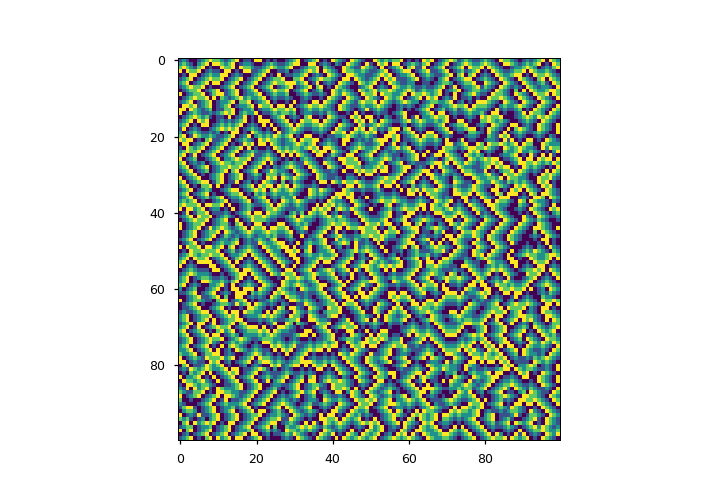

interactive(children=(IntSlider(value=0, description='t', max=199), Output()), _dom_classes=('widget-interact'…

Button(description='loop', style=ButtonStyle())

Output()

In [2]:
import sys
from matplotlib import style
style.use('seaborn-notebook')
sys.path.insert(0, '../')
from Models.Circular import CCA
import networkx as nx, numpy as np, matplotlib.pyplot as plt

n = 100
g = nx.grid_2d_graph(n,n, periodic = 1)
states = np.arange(0, 5).tolist()
threshold = .05
m = CCA(graph = g, threshold = threshold,\
        updateType = 'sync', \
        agentStates = states)
res = m.simulate(200)
print(m.nNodes, m.sampleSize)
print(m.threshold)
import ipywidgets as widgets

%matplotlib notebook
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
# c = np.array(list(g.nodes()))


slider = widgets.IntSlider(\
                           min   = 0,\
                           max   = res.shape[0] -1,\
                           value = 0,\
                                       )
@widgets.interact(t = slider
                 )
def update(t):
    h.set_data(res[t].reshape(n, n))
#     h.set_data(res[t])
    fig.canvas.flush_events()
    fig.canvas.draw()
    
button = widgets.Button(description = 'loop')
output = widgets.Output()
def on_click(b, t = 1):
    if not b.disabled:
        for i in res:
            h.set_data(i.reshape(n, n))
            fig.canvas.flush_events()
            fig.canvas.draw()
            
from IPython.display import display
display(button, output)
button.on_click(on_click)
fig.show()
    
    

In [2]:
a = 10
m.sampleNodes(a).base.shape

(10, 10000)